<strong>Paolo Schirru A2 Analysis</strong><br>

<strong>Machine Learning</strong><br>

The scope of this work is to create a predictive classifying model, based on the case study "Apprentice Chef" written by prof. Chase Kusterer at Hult International Business School.
In this part, I assess the factors that influence and lead to a Cross Sell Promotion. 

This work will include:

-Exploratory analysis

-Feature Engineering

-Modelling Techniques

In [1]:
#Load the required packages and the dataset

# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import math
from sklearn.model_selection import train_test_split #splits to training/test
import statsmodels.formula.api as smf #basic analysis
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.metrics import mean_squared_error as MSE# Mean squared error
from sklearn.ensemble import VotingClassifier        
from sklearn.model_selection import cross_val_score  # cross validation
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.ensemble import GradientBoostingClassifier #Ensemble Modeling
from sklearn.ensemble import RandomForestClassifier    #Ensemble Modeling

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the files into Python
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')
#original_df_dictionary = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

#If I want to save the file to excel at one point
#apprentice_chef.to_excel("apprentice_chef_modified.xlsx", index = False)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Flagging the missing values in the Family Name
if original_df['FAMILY_NAME'].isnull().astype(int).sum() > 0:
    original_df['m_'+'FAMILY_NAME'] = original_df['FAMILY_NAME'].isnull().astype(int)
    
    
#this creates a new columns that it will be used in the model to understand
#if not having the family name has an impact on cross-sell success

In [3]:
#Creating dummy variables for the email domains
#The dummy variables are used in the model to understand if the domain of the 
#email that is given has an impact on the promotion choice


# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)
del email_df[0]

# email domain types
personal_email_ = ['@gmail.com', '@yahoo.com','@protonmail.com']
profess_email   = ['@mmm.com','@amex.com','@apple.com','@boeing.com', 
                   '@caterpillar.com','@chevron.com', '@cisco.com',
                   '@cocacola.com','@disney.com','@dupont.com','@exxon.com',
                   '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com',
                   '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com',
                   '@merck.com', '@microsoft.com', '@nike.com', '@pfizer.com',
                   '@pg.com', '@travelers.com', '@unitedtech.com', 
                   '@unitedhealth.com', '@verizon.com', '@visa.com', 
                   '@walmart.com']
junk_email      = ['@me.com','@aol.com','@live.com','@msn.com',
                  '@passport.com','@hotmail.com']

#domain list
domains_lst = []

# looping to group observations by domain type
for domain in email_df[1]:
    
    if '@' + domain in personal_email_:
        domains_lst.append('personal')
    elif  '@' + domain in profess_email:
        domains_lst.append('professional')
    elif  '@' + domain in junk_email:
        domains_lst.append('junk')    
    else:
        print("There was an error")

# concatenating with original DataFrame
original_df['email_dom'] = pd.Series(domains_lst)

#Creating dummies for Emails
dummies = pd.get_dummies(original_df['email_dom'])

#Dropping EMAIL and email_dom from original_df
original_df = original_df.drop('EMAIL', axis = 1)
original_df = original_df.drop('email_dom', axis = 1)

#Joining the dummies to original_df
original_df = original_df.join([dummies])


In [4]:
"""original_df.loc[:,:].quantile([0.20,
                            0.40,
                            0.60,
                            0.80,
                            1.00])
                            
for col in original_df:        
    try:
        sns.distplot(original_df[col])
        plt.show()
    except:
        pass                         
                            """

'original_df.loc[:,:].quantile([0.20,\n                            0.40,\n                            0.60,\n                            0.80,\n                            1.00])\n                            \nfor col in original_df:        \n    try:\n        sns.distplot(original_df[col])\n        plt.show()\n    except:\n        pass                         \n                            '

Revenue: There seems to be a gap between the 0.8 and 1 quantiles. 

In [5]:
# setting outlier thresholds
#These points are considered outliers in the data
#We are telling the model to consider these thresholds and 
#to behave differently


REVENUE_HI                     = 3500
TOTAL_MEALS_ORDERED_HI         = 220
UNIQUE_MEALS_PURCH_HI          = 9
CONTACTS_W_CUSTOMER_SERVICE_LO = 3
CONTACTS_W_CUSTOMER_SERVICE_HI = 12.5
PRODUCT_CATEGORIES_VIEWED_LO   = 1
PRODUCT_CATEGORIES_VIEWED_HI   = 10
AVG_TIME_PER_SITE_VISIT_HI     = 250
CANCELLATIONS_BEFORE_NOON_HI   = 7
CANCELLATIONS_AFTER_NOON_HI    = 2.0
MOBILE_LOGINS_LO               = 5
MOBILE_LOGINS_HI               = 6
PC_LOGINS_LO                   = 1
PC_LOGINS_HI                   = 2
WEEKLY_PLAN_HI                 = 50
EARLY_DELIVERIES_HI            = 5
LATE_DELIVERIES_HI             = 10
FOLLOWED_RECOMMENDATIONS_PCT_HI= 90
AVG_PREP_VID_TIME_HI           = 280
LARGEST_ORDER_SIZE_LO          = 2
LARGEST_ORDER_SIZE_HI          = 8
MEDIAN_MEAL_RATING_LO          = 2
MEDIAN_MEAL_RATING_HI          = 4
AVG_CLICKS_PER_VISIT_LO        = 7.5
AVG_CLICKS_PER_VISIT_HI        = 17.5
TOTAL_PHOTOS_VIEWED_HI         = 450

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers
#REVENUE
original_df['out_rev'] = 0 
condition_hi = original_df.loc[0:,'out_rev'][original_df['REVENUE'] > REVENUE_HI]

original_df['out_rev'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#TOTAL MEALS ORDERED
original_df['out_total_meals'] = 0 
condition_hi = original_df.loc[0:,'out_total_meals'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

original_df['out_total_meals'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#UNIQUE_MEALS_PURCHASED
original_df['out_unique_meals'] = 0 
condition_hi = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

original_df['out_unique_meals'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#CONTACTS_W_CUSTOMER_SERVICE
original_df['out_contacts_c_s'] = 0 
condition_hi = original_df.loc[0:,'out_contacts_c_s'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]
condition_lo = original_df.loc[0:,'out_contacts_c_s'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_LO]

original_df['out_contacts_c_s'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_contacts_c_s'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#PRODUCT_CATEGORIES_VIEWED
original_df['out_prod_cat_view'] = 0 
condition_hi = original_df.loc[0:,'out_prod_cat_view'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]
condition_lo = original_df.loc[0:,'out_prod_cat_view'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_LO]

original_df['out_prod_cat_view'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
original_df['out_prod_cat_view'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
#AVG_TIME_PER_SITE_VISIT
original_df['out_avg_time_x_site_visit'] = 0 
condition_hi = original_df.loc[0:,'out_avg_time_x_site_visit'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

original_df['out_avg_time_x_site_visit'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#CANCELLATIONS_BEFORE_NOON
original_df['out_canc_bef_noon'] = 0 
condition_hi = original_df.loc[0:,'out_canc_bef_noon'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]

original_df['out_canc_bef_noon'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#CANCELLATIONS_AFTER_NOON
original_df['out_canc_af_noon'] = 0 
condition_hi = original_df.loc[0:,'out_canc_af_noon'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

original_df['out_canc_af_noon'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#MOBILE_LOGINS
original_df['out_mob_log'] = 0 
condition_hi = original_df.loc[0:,'out_mob_log'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_mob_log'][original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['out_mob_log'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_mob_log'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
#PC_LOGINS
original_df['out_pc_log'] = 0 
condition_hi = original_df.loc[0:,'out_pc_log'][original_df['PC_LOGINS'] > PC_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_pc_log'][original_df['PC_LOGINS'] < PC_LOGINS_LO]

original_df['out_pc_log'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_pc_log'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
#WEEKLY_PLAN
original_df['out_week_pl'] = 0 
condition_hi = original_df.loc[0:,'out_week_pl'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['out_week_pl'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#EARLY_DELIVERIES
original_df['out_early_del'] = 0 
condition_hi = original_df.loc[0:,'out_early_del'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['out_early_del'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#LATE_DELIVERIES
original_df['out_late_del'] = 0 
condition_hi = original_df.loc[0:,'out_late_del'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_late_del'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#FOLLOWED_RECOMMENDATIONS_PCT
original_df['out_fl_rec_pct'] = 0 
condition_hi = original_df.loc[0:,'out_fl_rec_pct'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]

original_df['out_fl_rec_pct'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#AVG_PREP_VID_TIME
original_df['out_avg_prep_vtm'] = 0 
condition_hi = original_df.loc[0:,'out_avg_prep_vtm'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

original_df['out_avg_prep_vtm'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)
#LARGEST_ORDER_SIZE
original_df['out_lst_ord_size'] = 0 
condition_hi = original_df.loc[0:,'out_lst_ord_size'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]
condition_lo = original_df.loc[0:,'out_lst_ord_size'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_LO]

original_df['out_lst_ord_size'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_lst_ord_size'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
"""#MASTER_CLASSES_ATTENDED
original_df['out_mst_cl_att'] = 0 
condition_hi = original_df.loc[0:,'out_mst_cl_att'][original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

original_df['out_mst_cl_att'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)"""
#MEDIAN_MEAL_RATING
original_df['out_meal_rt'] = 0 
condition_hi = original_df.loc[0:,'out_meal_rt'][original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]
condition_lo = original_df.loc[0:,'out_meal_rt'][original_df['MEDIAN_MEAL_RATING'] < MEDIAN_MEAL_RATING_LO]

original_df['out_meal_rt'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_meal_rt'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
#AVG_CLICKS_PER_VISIT
original_df['out_avg_cks_xvisit'] = 0 
condition_hi = original_df.loc[0:,'out_avg_cks_xvisit'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]
condition_lo = original_df.loc[0:,'out_avg_cks_xvisit'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_LO]

original_df['out_avg_cks_xvisit'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_avg_cks_xvisit'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
#TOTAL_PHOTOS_VIEWED
original_df['out_tot_ph_views'] = 0 
condition_hi = original_df.loc[0:,'out_tot_ph_views'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

original_df['out_tot_ph_views'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



In [6]:
#Scaling the data helps to have better predictions

scaling_data = original_df.drop(['NAME','FIRST_NAME',
                              'FAMILY_NAME'], axis = 1)

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(scaling_data)

# TRANSFORMING our data after fit
scaled_data = scaler.transform(scaling_data)

# converting scaled data into a DataFrame
scaled_data_df = pd.DataFrame(scaled_data)

# adding labels to the scaled DataFrame
scaled_data_df.columns = scaling_data.columns

# checking the results
scaled_data_df.describe().round(2)

# declaring response variable
chef_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

# declaring explanatory variables
chef_data = scaled_data_df.drop(['CROSS_SELL_SUCCESS'], axis = 1)

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)

# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [7]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ 
                                    FOLLOWED_RECOMMENDATIONS_PCT+
                                    REVENUE +
                                    TOTAL_MEALS_ORDERED +
                                    UNIQUE_MEALS_PURCH +
                                    CONTACTS_W_CUSTOMER_SERVICE +
                                    PRODUCT_CATEGORIES_VIEWED +
                                    AVG_TIME_PER_SITE_VISIT +
                                    MOBILE_NUMBER +
                                    CANCELLATIONS_BEFORE_NOON +
                                    CANCELLATIONS_AFTER_NOON +
                                    TASTES_AND_PREFERENCES +
                                    MOBILE_LOGINS +
                                    PC_LOGINS +
                                    WEEKLY_PLAN +
                                    EARLY_DELIVERIES +
                                    LATE_DELIVERIES +
                                    PACKAGE_LOCKER +
                                    REFRIGERATED_LOCKER +
                                    AVG_PREP_VID_TIME +
                                    LARGEST_ORDER_SIZE +
                                    MASTER_CLASSES_ATTENDED +
                                    MEDIAN_MEAL_RATING +
                                    AVG_CLICKS_PER_VISIT +
                                    TOTAL_PHOTOS_VIEWED +
                                    out_rev +
                                    out_total_meals +
                                    out_unique_meals +
                                    out_contacts_c_s +
                                    out_avg_time_x_site_visit +
                                    out_canc_bef_noon +
                                    out_canc_af_noon +
                                    out_mob_log +
                                    out_pc_log +
                                    out_week_pl +
                                    out_early_del +
                                    out_late_del +
                                    out_avg_prep_vtm +
                                    out_lst_ord_size +
                                    out_meal_rt +
                                    out_avg_cks_xvisit +
                                    out_tot_ph_views+
                                    m_FAMILY_NAME+
                                    junk+
                                    professional
                                    """,
                           data    = chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.424522
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1414
Method:                           MLE   Df Model:                           44
Date:                Thu, 06 Feb 2020   Pseudo R-squ.:                  0.3240
Time:                        23:47:07   Log-Likelihood:                -619.38
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.189e-97
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.3396      0.094     14.301      0.000       1.156       1.523
FOLLOWED_RECOMMENDATIONS_PCT     1.6031      0.112     14.313      0.000       1.384       1.823
REVENUE                         -0.0111      0.157     -0.071      0.944      -0.319       0.296
TOTAL_MEALS_ORDERED              0.1216      0.112      1.085      0.278      -0.098       0.341
UNIQUE_MEALS_PURCH               0.0519      0.078      0.668      0.504      -0.100       0.204
CONTACTS_W_CUSTOMER_SERVICE      0.0704      0.078      0.898      0.369      -0.083       0.224
PRODUCT_CATEGORIES_VIEWED        0.0008      0.072      0.011      0.991      -0.140       0.142
AVG_TIME_PER_SITE_VISIT          0.0995      0.089      1.120      0.263      -0.075       0.274
MOBILE_NUMBER                    0.2724      0.069      3.949      0.000       0.137       0.408
CANCELLATIONS_BEFORE_NOON        0.6007      0.141      4.263      0.000       0.325       0.877
CANCELLATIONS_AFTER_NOON        -0.1054      0.068     -1.547      0.122      -0.239       0.028
TASTES_AND_PREFERENCES           0.1485      0.071      2.098      0.036       0.010       0.287
MOBILE_LOGINS                    0.0972      0.070      1.382      0.167      -0.041       0.235
PC_LOGINS                       -0.1828      0.072     -2.552      0.011      -0.323      -0.042
WEEKLY_PLAN                      0.0672      0.076      0.888      0.374      -0.081       0.215
EARLY_DELIVERIES                 0.1639      0.114      1.443      0.149      -0.059       0.386
LATE_DELIVERIES                  0.0677      0.083      0.816      0.414      -0.095       0.230
PACKAGE_LOCKER                  -0.0586      0.080     -0.729      0.466      -0.216       0.099
REFRIGERATED_LOCKER              0.1524      0.084      1.809      0.071      -0.013       0.318
AVG_PREP_VID_TIME                0.0469      0.163      0.287      0.774      -0.273       0.367
LARGEST_ORDER_SIZE               0.0473      0.123      0.383      0.702      -0.195       0.289
MASTER_CLASSES_ATTENDED          0.0776      0.085      0.914      0.361      -0.089       0.244
MEDIAN_MEAL_RATING              -0.1718      0.171     -1.002      0.316      -0.508       0.164
AVG_CLICKS_PER_VISIT            -0.1679      0.155     -1.082      0.279      -0.472       0.136
TOTAL_PHOTOS_VIEWED              0.1226      0.124      0.987      0.324      -0.121       0.366
out_rev                         -0.1463      0.122     -1.199      0.230      -0.385       0.093
out_total_meals                 -0.1398      0.091     -1.539      0.124      -0.318       0.038
out_unique_meals                 0.0416      0.073      0.573      0.567      -0.101       0.184
out_contacts_c_s                -0.0913      0.075     -1.218      0.223      -0.238       0.056
out_avg_time_x_site_visit       -0.0513      0.081     -0.632      0.527      -0.210       0.108
out_canc_bef_noon               -0.0830 

In [8]:
followed_odds = math.e**1.6031
followed_prob = round((followed_odds/(followed_odds+1))*100,2)
number_odds = math.e**0.2724
number_prob = round((number_odds/(number_odds+1))*100,2)
print(f"Probability increase for users that follow the recommendations: {followed_prob}")
print(f"Probability increase for users that give their number: {number_prob}")

Probability increase for users that follow the recommendations: 83.25
Probability increase for users that give their number: 56.77


In [9]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score:', roc_auc_score(y_true  = y_test,
                              y_score = logreg_pred).round(4))

Training ACCURACY: 0.7786
Testing  ACCURACY: 0.7454
AUC Score: 0.7076


In [10]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = 26)

# FITTING to the training data
knn_reg.fit(X_train, y_train)

# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)

knn_auc = roc_auc_score(y_true  = y_test,
                              y_score = knn_reg_pred).round(4)

# SCORING the results
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score:',  knn_reg.score(X_test, y_test).round(4))
print(f'AUC: {knn_auc}')


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

Training Score: 0.7587
Testing Score: 0.7413
AUC: 0.6436


In [11]:
# INSTANTIATING a classification tree object
tree = DecisionTreeClassifier()


# FITTING the training data
tree_fit = tree.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.6982
AUC Score        : 0.6509


In [12]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(
                                    n_estimators     = 350,
                                    criterion        = 'entropy',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = False,
                                    warm_start       = True,
                                    random_state     = 222)


# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7556
AUC Score        : 0.705


In [13]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8931
Testing ACCURACY : 0.7782
AUC Score        : 0.7589


<strong>Comment on the model</strong><br>
Even though, this model seems to have a good score, it cannot be used as it is
overfitting. This means that mimics too closely, the data on which it has been
trained. As a result, the risk is that it won't work on new data

In [14]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [15]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [16]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 5,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))




Training ACCURACY: 0.8053
Testing  ACCURACY: 0.77
AUC Score        : 0.7698


<strong>Comment on the Tree Classifier</strong><br>

The Tree Classifier is the best model so far.
The score is close to the of the Gradient Boosting Classifier; however,
this model is not overfitting. 

[[120  36]
 [ 76 255]]


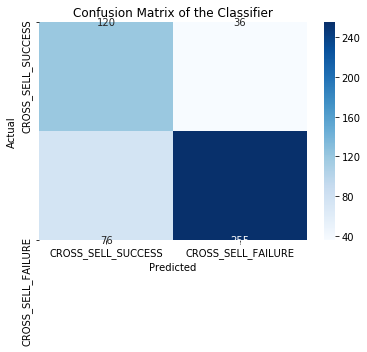

In [17]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = tree_pred))

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = tree_pred,
          labels = ['CROSS_SELL_SUCCESS', 'CROSS_SELL_FAILURE'])

<strong>Confusion Matrix Explanation</strong><br>

The Confusion Matrix helps us to identify the errors of the model and the 
performance of the algorithm. 
In this case, we can see that:

120 times, the predicted success is in line with the actual happenings
255 times, the predicted failure is in line with the actual happenings

76 times, the algorithm predicts success, while it is a failure
36 times, the algorithm predicts failure, while it is a success

In [18]:
# calling display_tree
"""display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)"""

'display_tree(tree       = tree_pruned_fit,\n             feature_df = X_train)'

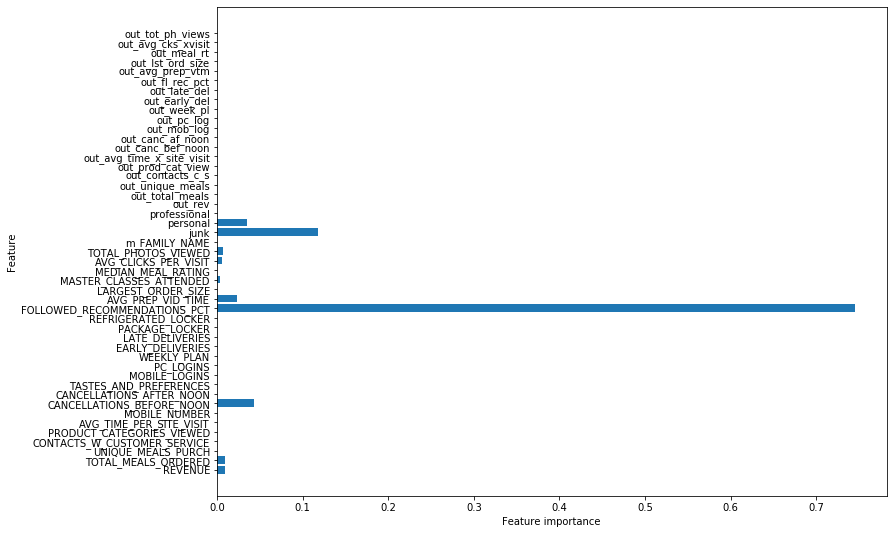

In [19]:
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

<strong>Features use explanation</strong><br>

The plot displays the frequency of the features that are most used in the previous model:
the pruned tree. 

This means that what is most useful and has been mostly used by the algorithm is if the users
follow the recommendations and the email that they give when they register.
Also, the cancellations before noon has a high impact on the algorithm behavior. 

<strong>Model Improvement</strong><br>

Few of the factors seem to have an impact on the model. 
Let's use a couple and see if the model improves.

In [20]:
# declaring response variable
chef_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

# declaring explanatory variables
chef_data_2 = scaled_data_df.loc[:,['FOLLOWED_RECOMMENDATIONS_PCT','MOBILE_NUMBER',
                                    
                                    ]]

# train-test split with stratification
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
            chef_data_2,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)



In [21]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train_2, y_train_2)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test_2)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train_2, y_train_2).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test_2, y_test_2).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_2,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7546
Testing ACCURACY : 0.7618
AUC Score        : 0.8112


The model improves using these factors:

FOLLOWED_RECOMMENDATIONS_PCT' and 'MOBILE_NUMBER

In [22]:
# INSTANTIATING a classification tree object
tree_pruned_2 = DecisionTreeClassifier(max_depth = 5,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit_2  = tree_pruned.fit(X_train_2, y_train_2)


# PREDICTING on new data
tree_pred_2 = tree_pruned_fit_2.predict(X_test_2)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit_2.score(X_train_2, y_train_2).round(4))
print('Testing  ACCURACY:', tree_pruned_fit_2.score(X_test_2, y_test_2).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_2,
                                          y_score = tree_pred).round(4))





Training ACCURACY: 0.7519
Testing  ACCURACY: 0.77
AUC Score        : 0.7698


The tree does not seem to improve that much, but it can still be used as a source
of visual interpretation. 

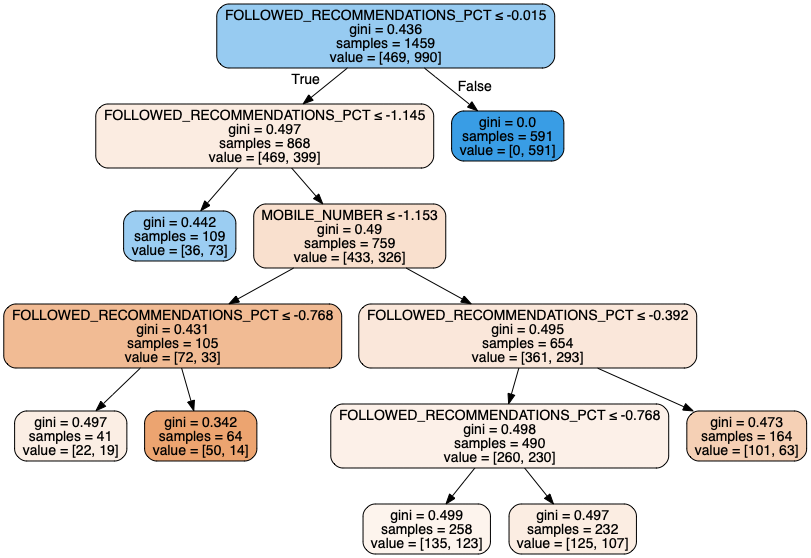

In [23]:
# calling display_tree
display_tree(tree       = tree_pruned_fit_2,
             feature_df = X_train_2)

<strong>Classification Tree Interpretation</strong><br>

The tree shows the impact of FOLLOWED_RECOMMENDATIONS_PCT and of MOBILE_NUMBER. 
FOLLOWED_RECOMMENDATIONS_PCT is the biggest factor in splitting the data. 
MOBILE_NUMBER is also impactful. 

[[148   8]
 [108 223]]


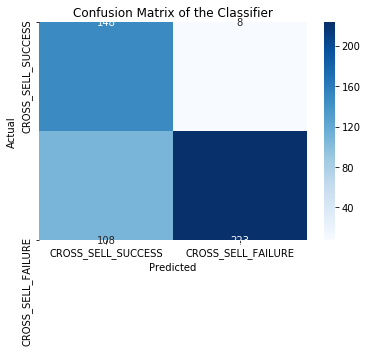

In [24]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test_2,
                       y_pred = full_gbm_default_pred))

# calling the visual_cm function
visual_cm(true_y = y_test_2,
          pred_y = full_gbm_default_pred,
          labels = ['CROSS_SELL_SUCCESS', 'CROSS_SELL_FAILURE'])

<strong>Confusion Matrix Comment</strong><br>

The Confusion Matrix is also better. 
The predicted results are more in line with what is really happening